## Tasca S8 T01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

#Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scipy.cluster.hierarchy as shc
from kneed import DataGenerator, KneeLocator

### Importar el dataset

In [2]:
df = pd.read_csv("dataset/Publicacions Facebook Thailandia.csv", index_col = None, header = 0)
df.sample(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
2131,246675545449582_278267915623678,photo,10/16/2012 7:29,33,6,0,33,0,0,0,0,0,NaN,NaN,NaN,NaN
2795,134115277150304_255103458384818,photo,5/5/2018 1:06,18,0,1,18,0,0,0,0,0,NaN,NaN,NaN,NaN
3740,134115277150304_154350555126776,photo,7/17/2017 6:47,4,0,0,4,0,0,0,0,0,NaN,NaN,NaN,NaN
6652,1050855161656896_1463187840423624,photo,11/29/2017 14:24,42,9,0,39,3,0,0,0,0,NaN,NaN,NaN,NaN
2415,246675545449582_259125824204554,photo,8/22/2012 8:35,15,0,0,15,0,0,0,0,0,NaN,NaN,NaN,NaN


**Abstract:** Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.

**Attribute Information:**
* status_id
* status_type
* status_published
* num_reactions
* num_comments
* num_shares
* num_likes
* num_loves
* num_wows
* num_hahas
* num_sads
* num_angrys

**Data Set Information:** The variability of consumer engagement is analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. The seasonal component is analysed through a study of the averages of the different engagement metrics for different time-frames (hourly, daily and monthly). Finally, we identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities.

Las columnas *Column1,Column2,Column3,Column4* no contienen datos. Para seleccionar los datos de nuestro interés, eliminamos las columnas no deseadas utilizandola función *drop()*.

In [3]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4' ], axis=1)

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Obtenemos informacion basica del tipo de datos que contiene el dataset con la funcion info().

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [6]:
df.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

El dataset no contiene datos nulos o faltantes. No obstante, ¿algún dato estará repetido?  

In [7]:
df.status_id.nunique()

6997

En el status_id del post se observan 6997 datos únicos, es decir, que 53 post parecen estar repetidos o duplicados. Verificaremos nuestra hipotesis con la fecha y hora de publicación.

In [8]:
df[df.duplicated(keep=False)].sort_values(by="status_published",ascending=False)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6171,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6172,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6173,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6269,819700534875473_954387151406810,photo,3/20/2018 1:54,186,15,1,172,3,11,0,0,0
6219,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0
6270,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0
6220,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0


Efectivamente encontramos publicaciones repetidas, por lo que procedemos a eliminar las filas repetidas.

In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   num_reactions     6999 non-null   int64 
 4   num_comments      6999 non-null   int64 
 5   num_shares        6999 non-null   int64 
 6   num_likes         6999 non-null   int64 
 7   num_loves         6999 non-null   int64 
 8   num_wows          6999 non-null   int64 
 9   num_hahas         6999 non-null   int64 
 10  num_sads          6999 non-null   int64 
 11  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


#### Primera exploración gráfica y descriptiva de los atributos del dataset

En este primer análisis del dataset  nos interesa conocer de qué manera el formato de los contenidos influye en la repuesta emocional de los usuarios y explorar hasta qué punto las gramáticas de acción de Facebook dejan espacio para reacciones.

In [11]:
df['num_emotions'] = df.num_loves + df.num_wows + df.num_hahas + df.num_sads + df.num_angrys

In [12]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.99,452.88,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.55,892.74,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.26,132.05,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.95,439.55,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.75,40.11,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.25,8.73,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.70,3.97,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.23,1.48,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.11,0.69,0.0,0.0,0.0,0.0,31.0
num_emotions,6999.0,15.05,47.94,0.0,0.0,0.0,5.0,886.0


Cifras totales de datos capturados 

In [13]:
plotdata = df.groupby('status_type').agg({'status_id':'count',
                                          'num_comments':'sum',
                                          'num_reactions':'sum', 
                                          'num_likes':'sum', 
                                          'num_emotions':'sum'}).round(2)

plotdata.rename(columns={'status_id':'Publicaciones',
                         'num_comments':'Comentarios',
                         'num_reactions':'Reacciones',
                         'num_likes':'Likes',
                         'num_emotions':'Emociones'},
               inplace=True)

plotdata.sort_values(by='Publicaciones',ascending=False)

,Publicaciones,Comentarios,Reacciones,Likes,Emociones
status_type,,,,,
photo,4244,65678,731372,721490,9869
video,2333,1499524,661102,566844,94252
status,359,13078,158944,157797,1147
link,63,359,23319,23286,33


Dado que a las reacciones emocionales (love, wow, haha, sad y angry) en Facebook les damos un mayor valor de significación, pues la acción de elegir entre una de ellas exige al usuario realizar un ejercicio de reflexión, y su opción revela
con mayor precisión su estado de ánimo, eliminamos del conjunto analizado el like y analizamos, de entre las reacciones más complejas, cuáles son las más utilizadas. En el gráfico 2 se muestra el reparto de reacciones sobre el total de las publicaciones analizadas. 

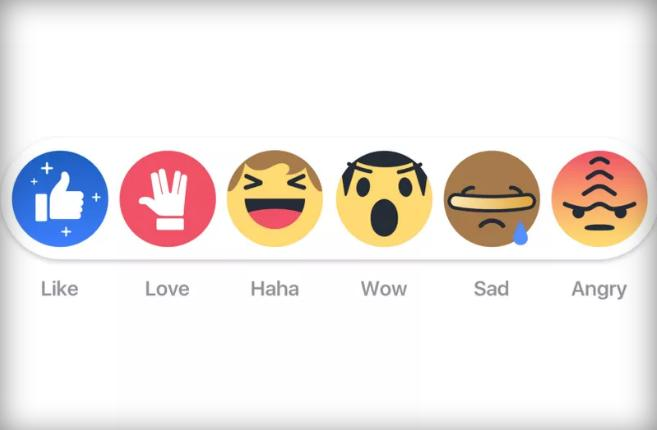

In [14]:
data_emotions = df.groupby('status_type').agg({'num_likes':'mean',
                                       'num_loves':'mean',
                                        'num_wows':'mean', 
                                        'num_hahas':'mean', 
                                        'num_sads':'mean', 
                                        'num_angrys':'mean', 
                                        'num_reactions':'mean',
                                        'status_id':'count'}).round(2)

data_emotions.rename(columns={'num_loves':'Loves',
                         'num_wows':'Wows',
                         'num_hahas':'Haha',
                         'num_sads':'Sads',
                         'num_angrys':'Angrys',
                         'num_reactions':'Total reacciones','status_id':'Total publicaciones'},
               inplace=True)

data_emotions

,num_likes,Loves,Wows,Haha,Sads,Angrys,Total reacciones,Total publicaciones
status_type,,,,,,,,
link,369.62,0.30,0.19,0.03,0.00,0.00,370.14,63
photo,170.00,1.35,0.62,0.19,0.13,0.04,172.33,4244
status,439.55,1.53,1.18,0.11,0.35,0.03,442.74,359
video,242.97,35.55,2.45,1.74,0.41,0.25,283.37,2333


**Tabla X**: Distribución de las publicaciones por formato y por tipo de reacción

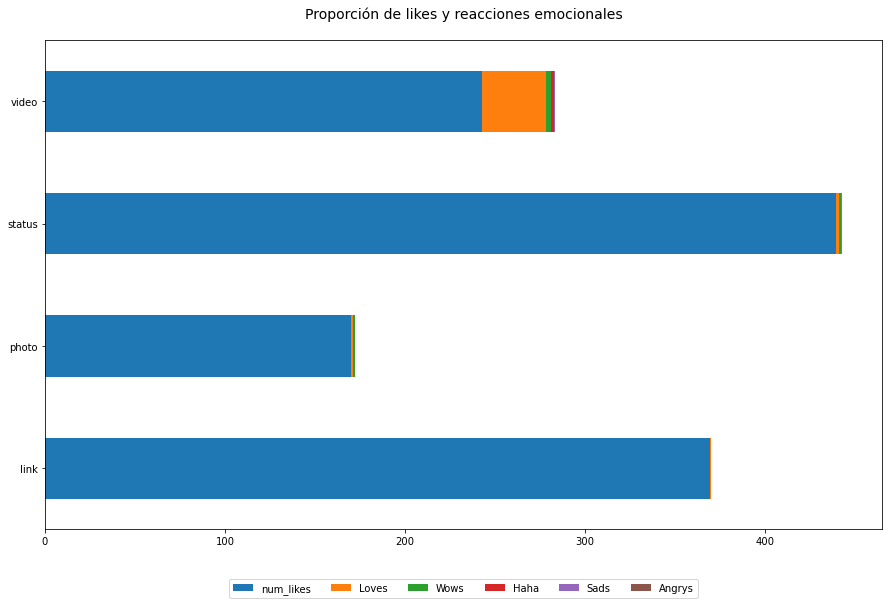

In [15]:
plotdata1 = data_emotions[['num_likes','Loves','Wows','Haha','Sads','Angrys']]

plotdata1.plot(kind='barh', stacked=True, figsize=(15,9))

plt.title("Proporción de likes y reacciones emocionales\n", fontsize=14)
plt.ylabel("")
plt.xlabel("")
plt.legend(bbox_to_anchor =(0.5,-0.15),loc='lower center', ncol=6)

## Exercici 1

*Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.*

Estudiar el dataset me ha permitido no solo encontrar agrupaciones en cuanto a qué formato de contenido favorece la interacción en clave de like o comentario sino también encontrar otro tipo de agrupaciones propiamente dadas por el tipo de datos con el que estamos tratando, por ejemplo grupos de empresas o clientes. 

Analizando la columna ***status_id*** es posible encontrar hasta 9 grupos de empresas. Esta agrupación inicial nos servirá para evaluar la bonanza del clustering o si simplemente dicha agrupación seguirá otros patrones.

De este modo procedemos a separar e identificar cada una de las empresas del dataset: 

In [16]:
df[['Id', 'status_id',]] = df['status_id'].str.rsplit(pat='_', expand=True)

In [17]:
df.Id.unique()

array(['246675545449582', '134115277150304', '146481362756646',
       '117059915488335', '848451358648417', '725980084255106',
       '614855718638584', '819700534875473', '1050855161656896'],
      dtype=object)

In [18]:
df.loc[df['Id'] == '246675545449582',  'Companies'] = "1"
df.loc[df['Id'] == '134115277150304',  'Companies'] = "2"
df.loc[df['Id'] == '146481362756646',  'Companies'] = "3"
df.loc[df['Id'] == '117059915488335',  'Companies'] = "4"
df.loc[df['Id'] == '848451358648417',  'Companies'] = "5"
df.loc[df['Id'] == '725980084255106',  'Companies'] = "6"
df.loc[df['Id'] == '614855718638584',  'Companies'] = "7"
df.loc[df['Id'] == '819700534875473',  'Companies'] = "8"
df.loc[df['Id'] == '1050855161656896', 'Companies'] = "9"
df['Companies'] = df['Companies'].astype(int)

In [19]:
df.sample(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_emotions,Id,Companies
6409,1579133888829018,link,3/27/2018 12:28,9,1,0,9,0,0,0,0,0,0,1050855161656896,9
1783,391818580935277,photo,6/23/2013 3:18,45,0,0,45,0,0,0,0,0,0,246675545449582,1
2789,255437611684736,photo,5/5/2018 23:11,140,0,0,138,2,0,0,0,0,2,134115277150304,2
1639,456468247803643,video,11/3/2013 2:51,374,9,16,374,0,0,0,0,0,0,246675545449582,1
2402,259714144145722,photo,8/24/2012 5:26,21,3,0,21,0,0,0,0,0,0,246675545449582,1


A continuacón vemos las relación entre las publicaciones de diferente naturaleza (video, fotos, estados y enlaces) y empresas.

In [20]:
pd.crosstab(df.Companies, df.status_type)

status_type,link,photo,status,video
Companies,,,,
1,33,1869,136,597
2,13,978,33,188
3,0,85,7,33
4,0,11,0,45
5,0,4,0,446
6,3,50,62,137
7,0,783,9,648
8,0,44,6,1
9,14,420,106,238


<AxesSubplot:xlabel='Companies', ylabel='count'>

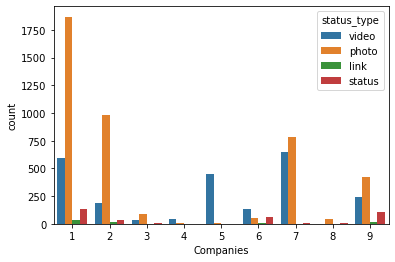

In [21]:
sns.countplot(x=df.Companies, hue=df.status_type)

### 1. Preprocesado

In [22]:
df = df.drop(['status_id','status_published','num_emotions', 'Id'],axis=1)
data = df.copy()

#### Datos categóricos
La variable ***type*** es categórica y utilizaremos OneHotEncoder.

In [23]:
data = pd.get_dummies(data,  prefix= 'type', columns=['status_type'])

#### Datos numéricos
Primero comprobaremos si el conjunto de datos se presentan una distribución normal y, por lo tanto, podemos aplicar la estandarización en los datos.

In [24]:
from scipy.stats import shapiro

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for c in data:
    stat, p = shapiro(data[c])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(c + ' Probably Gaussian\n')
    else:
        print(c + ' Probably NOT Gaussian\n')

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


stat=0.508, p=0.000
num_reactions Probably NOT Gaussian

stat=0.262, p=0.000
num_comments Probably NOT Gaussian

stat=0.338, p=0.000
num_shares Probably NOT Gaussian

stat=0.487, p=0.000
num_likes Probably NOT Gaussian

stat=0.353, p=0.000
num_loves Probably NOT Gaussian

stat=0.106, p=0.000
num_wows Probably NOT Gaussian

stat=0.148, p=0.000
num_hahas Probably NOT Gaussian

stat=0.136, p=0.000
num_sads Probably NOT Gaussian

stat=0.141, p=0.000
num_angrys Probably NOT Gaussian

stat=0.797, p=0.000
Companies Probably NOT Gaussian

stat=0.066, p=0.000
type_link Probably NOT Gaussian

stat=0.620, p=0.000
type_photo Probably NOT Gaussian

stat=0.228, p=0.000
type_status Probably NOT Gaussian

stat=0.595, p=0.000
type_video Probably NOT Gaussian



C:\Users\maria\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Ninguna parece normal, por lo por lo que utilizaremos RobustScaler ya que los registros de los post contienen outliers

In [25]:
#RobustScaler para las variables con outliers
robColumns = ['num_reactions','num_comments','num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']
robustScaler = preprocessing.RobustScaler().fit(data[robColumns])
data[robColumns] = robustScaler.transform(data[robColumns])

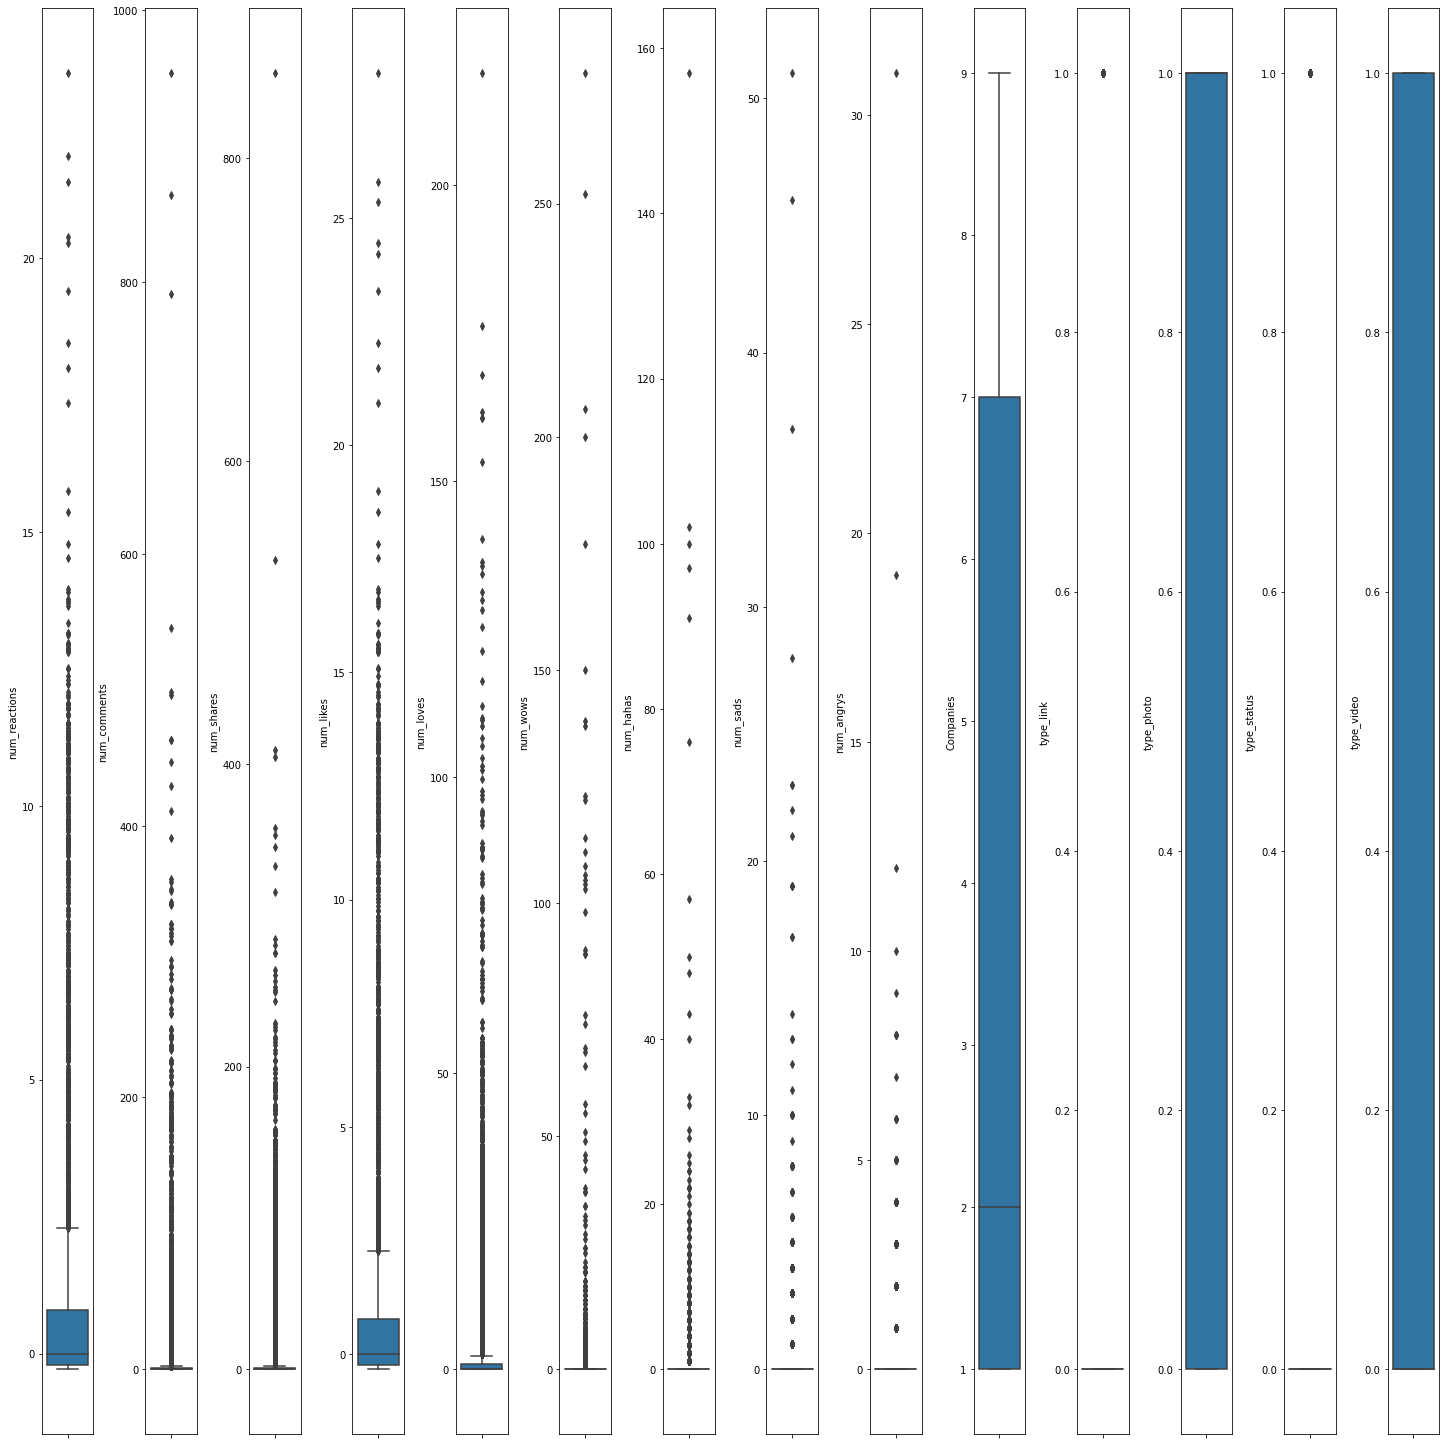

In [26]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [27]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Companies,type_link,type_photo,type_status,type_video
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,0.839169,10.070549,10.064652,0.926950,4.250512,1.252893,0.697957,0.232605,0.110159,3.844835,0.009001,0.606372,0.051293,0.333333
std,2.275783,40.579228,33.011726,2.663941,13.368957,8.725551,3.970912,1.481105,0.688582,3.005270,0.094454,0.488589,0.220611,0.471438
min,-0.291457,-0.181818,0.000000,-0.345455,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.206030,-0.181818,0.000000,-0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,0.793970,0.818182,1.000000,0.757576,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000
max,23.376884,953.909091,856.000000,28.200000,219.000000,278.000000,157.000000,51.000000,31.000000,9.000000,1.000000,1.000000,1.000000,1.000000


### 2. PCA (Principal Component Analisis)

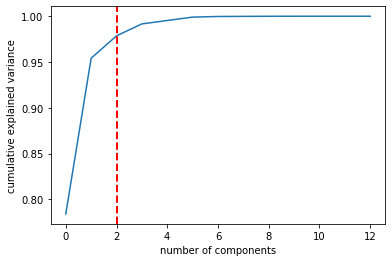

In [28]:
from sklearn.decomposition import PCA

X = data.drop(['Companies'],axis=1)
y = data['Companies']

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x = 2, ymin = 0, color = 'red', linewidth =2, ls = '--' )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [29]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(X), columns=['PCA1', 'PCA2'], index=data.index)
df_pca.head()

,PCA1,PCA2
0,48.146219,39.281738
1,-14.876282,-2.242583
2,3.375964,3.441262
3,-14.880365,-2.249211
4,-14.270582,-1.396058


### 3. Models

#### 3.1 K-Means

In [30]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def elbow_plot(df_pca):
    """Create elbow plot from normalized data"""
    sse = {}
    sse_r = []
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_pca)
        sse[k] = kmeans.inertia_
        sse_r.append(kmeans.inertia_)
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()
    return sse_r

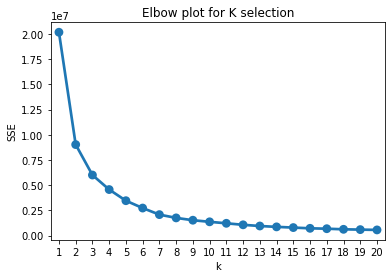

In [31]:
sse = elbow_plot(df_pca)

In [32]:
kl = KneeLocator(range(1, 21), sse, curve="convex", direction="decreasing")
kl.elbow

5

In [33]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(df_pca)

KMeans(n_clusters=5, random_state=42)

In [34]:
y_pred_KM = k_means.predict(df_pca)
y_pred_KM

array([4, 0, 0, ..., 0, 0, 0])

In [35]:
df_pca['predicted_cluster_KM'] = y_pred_KM
df_pca["true_label"] = df['Companies'].round(1)
df_pca.head()

,PCA1,PCA2,predicted_cluster_KM,true_label
0,48.146219,39.281738,4,1
1,-14.876282,-2.242583,0,1
2,3.375964,3.441262,0,1
3,-14.880365,-2.249211,0,1
4,-14.270582,-1.396058,0,1


### 4. Visualización

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


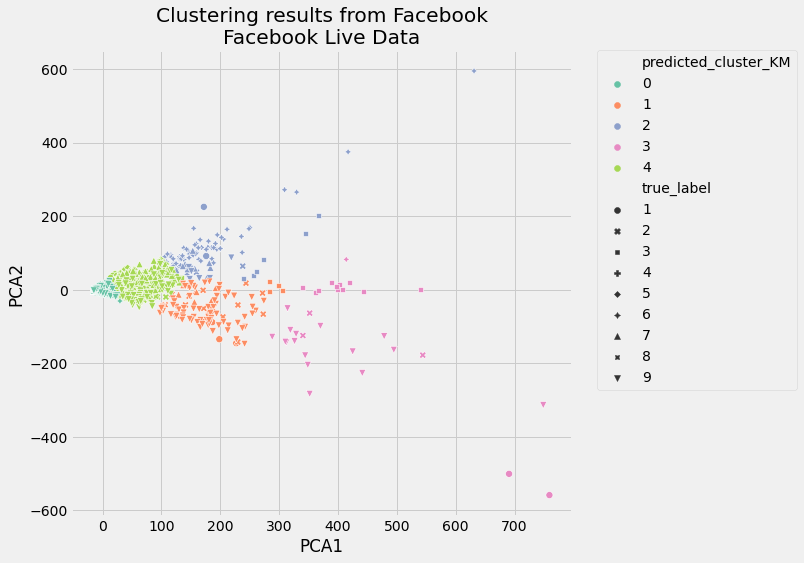

In [36]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "PCA1",
    "PCA2",
    s=50,
    data=df_pca,
    hue="predicted_cluster_KM",
    style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results from Facebook\nFacebook Live Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 97 out of 6999 samples were correctly labeled.
Accuracy score: 0.01


Los resultados obtenidos tras entrenar nuestro modelo nos muestra agrupaciones diferentes a las propuestas en un inicio.

In [38]:
data['predicted_cluster_KM'] = y_pred_KM

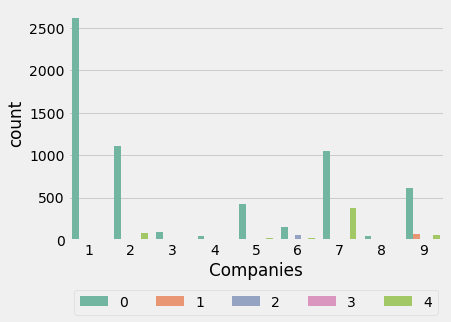

In [57]:
ax = sns.countplot(x="Companies", hue="predicted_cluster_KM", data=data, palette="Set2")
plt.legend(bbox_to_anchor =(0.5,-0.35),loc='lower center', ncol=5)

In [39]:
pd.crosstab(data.predicted_cluster_KM, data.Companies)

Companies,1,2,3,4,5,6,7,8,9
predicted_cluster_KM,,,,,,,,,
0,2615,1103,98,45,430,159,1047,51,619
1,3,15,4,0,0,0,7,0,77
2,2,2,6,0,0,63,10,0,6
3,2,3,11,0,0,1,0,0,16
4,13,89,6,11,20,29,376,0,60


Efectivament las agrupaciones no tienen en cuenta el tipo de empresa.

A continuación comprobaremos si siguen la naturaleza del post:

In [59]:
data8 = data.groupby(['predicted_cluster_KM']).agg({'type_link':'sum',
                              'type_photo':'sum',
                              'type_status':'sum',
                              'type_video':'sum'}).round(0)

data8

,type_link,type_photo,type_status,type_video
predicted_cluster_KM,,,,
0,63,4238.0,359.0,1507.0
1,0,0.0,0.0,106.0
2,0,1.0,0.0,88.0
3,0,1.0,0.0,32.0
4,0,4.0,0.0,600.0


In [41]:
df['predicted_cluster_KM'] = y_pred_KM

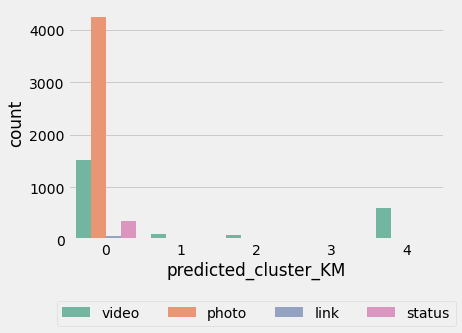

In [60]:
ax = sns.countplot(x="predicted_cluster_KM", hue="status_type", data=df, palette="Set2")
plt.legend(bbox_to_anchor =(0.5,-0.4),loc='lower center', ncol=4)

En el **Cluster0** identificamos practimanete la totalidad de publicaciones de tipo: *link, photo y status*.

Y por último comprobaremos el engagement de los post:

In [68]:
data9 = data.groupby(['predicted_cluster_KM']).agg({'num_reactions':'mean',
                              'num_comments':'mean',
                              'num_shares':'mean',
                              'num_likes':'mean'})

data9

,num_reactions,num_comments,num_shares,num_likes
predicted_cluster_KM,,,,
0,0.714547,1.084917,1.101873,0.847302
1,1.512278,182.083190,80.757075,1.332933
2,6.052453,87.220633,184.921348,5.526864
3,3.322065,409.446281,173.583333,3.045179
4,1.089620,38.440247,54.471440,0.875396


Parece que el **Cluster 3** agrupa las publicaciones con mayor engagement(comentarios, shares..)

## Exercici 2

*Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.*

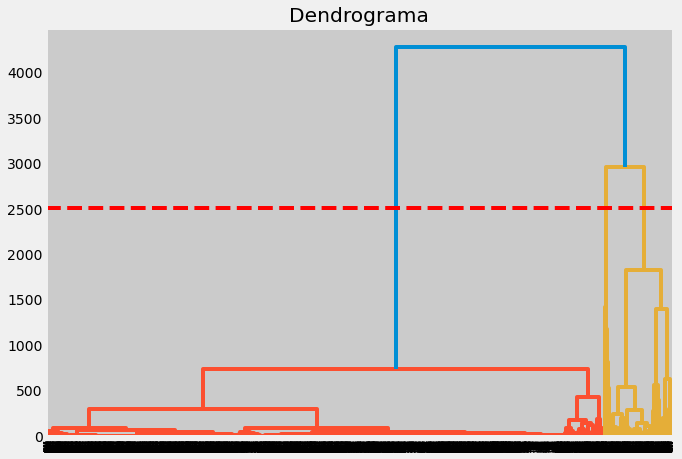

In [45]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dendrogram = shc.dendrogram(shc.linkage(df_pca, method='ward'))

plt.axhline(y=2500, color='r', linestyle='--')

#### modelo Aglomerativo

In [46]:
from sklearn.cluster import AgglomerativeClustering

aglomerativo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
aglomerativo.fit(df_pca)

y_pred_agg = aglomerativo.labels_

y_pred_agg

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
df_pca['predicted_cluster_AGG'] = y_pred_agg

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


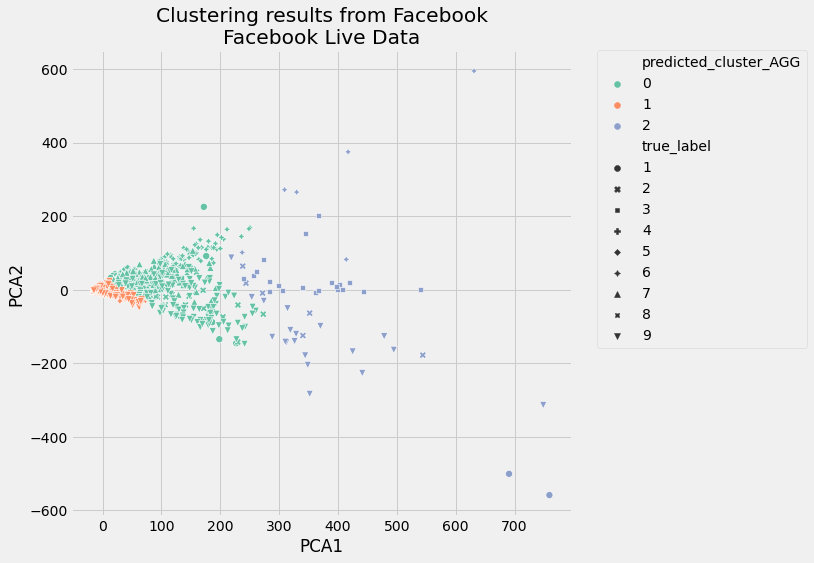

In [48]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "PCA1",
    "PCA2",
    s=50,
    data=df_pca,
    hue="predicted_cluster_AGG",
    style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results from Facebook\nFacebook Live Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

## Exercici 3

*Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.*

In [49]:
from sklearn.metrics import silhouette_score


score_KM = silhouette_score(data, k_means.labels_, metric='euclidean')

#score_agg = silhouette_score(data, aglomerativo.labels_, metric='euclidean')

print('El resultado de la prueba de siluata para el modelo k-means es de:', score_KM)

El resultado de la prueba de siluata para el modelo k-means es de: 0.8136578666307572


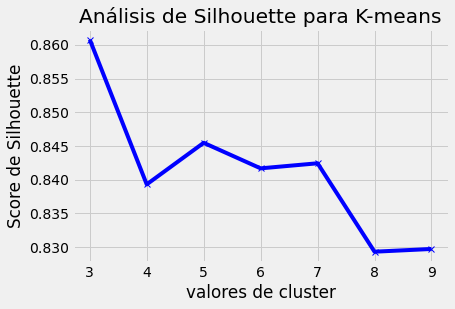

In [50]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_pca)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(df_pca, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
    
plt.xlabel('valores de cluster') 
plt.ylabel('Score de Silhouette') 
plt.title('Análisis de Silhouette para K-means')
plt.show()